# Build a machine learning model that predicts the type of people who survived
the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.).
Dataset Link: https://www.kaggle.com/competitions/titanic/data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("F://train.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.drop(columns=['PassengerId','Name'],inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Sex'].isnull().sum()

0

In [9]:
df["Sex"]=pd.get_dummies(df['Sex'],drop_first=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

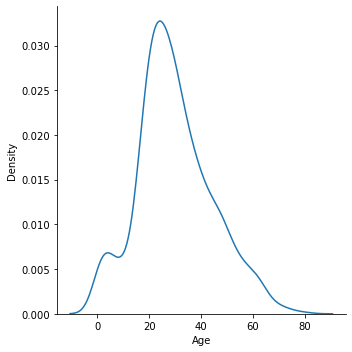

In [12]:
sns.displot(x=df["Age"],kind='kde')

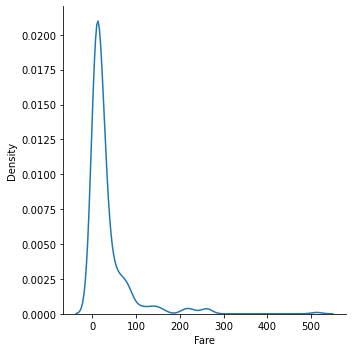

In [13]:
sns.displot(x=df["Fare"],kind='kde')

<AxesSubplot:>

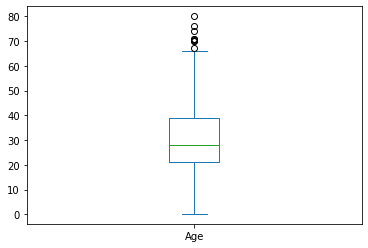

In [14]:
df["Age"].plot(kind="box")

<AxesSubplot:>

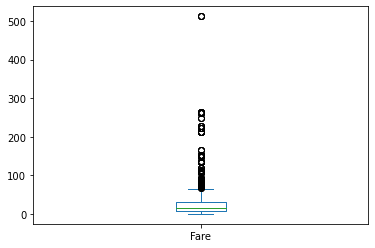

In [15]:
df["Fare"].plot(kind="box")

In [16]:
df["Fare"]=df["Fare"].fillna(df["Fare"].median())
df["Age"]=df["Age"].fillna(df["Age"].median())

<AxesSubplot:>

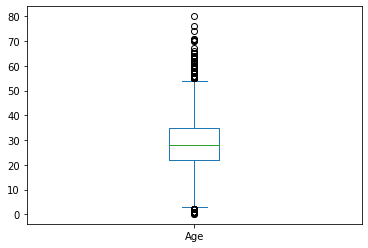

In [17]:
df["Age"].plot(kind="box")

In [18]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       2
dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Age'>

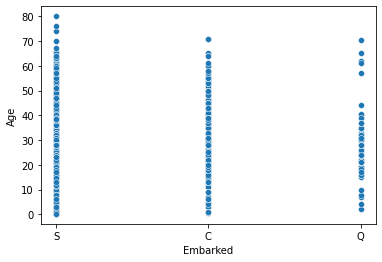

In [19]:
sns.scatterplot(df["Embarked"],df["Age"])

In [20]:
df["Embarked"]=df["Embarked"].fillna("S")

In [21]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.shape

(1309, 10)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='Age'>

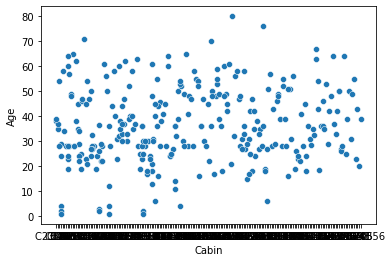

In [24]:
sns.scatterplot(df["Cabin"],df["Age"])

In [25]:
df=df.drop('Cabin',axis=1)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


In [27]:
df=df.drop("Ticket",axis=1)

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,1,28.0,0,0,8.0500,S
1305,1,1,0,39.0,0,0,108.9000,C
1306,0,3,1,38.5,0,0,7.2500,S
1307,0,3,1,28.0,0,0,8.0500,S


<AxesSubplot:>

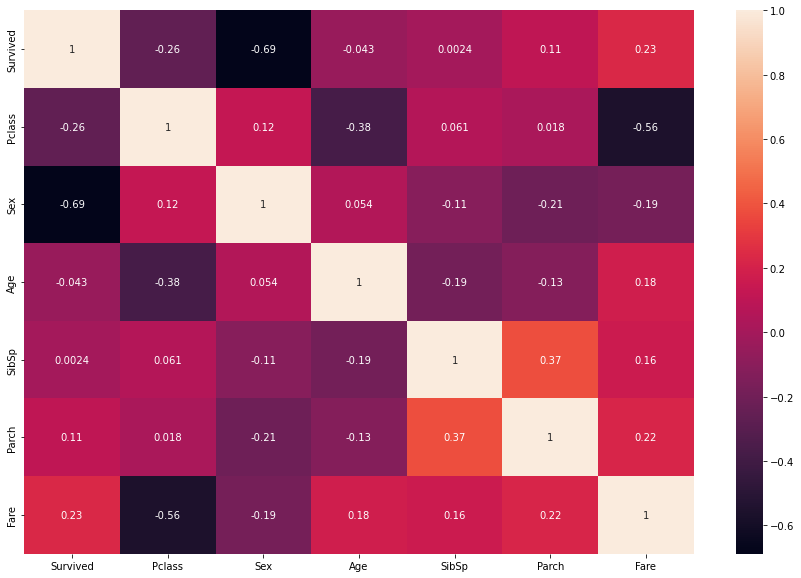

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [30]:
df.dtypes

Survived      int64
Pclass        int64
Sex           uint8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [31]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

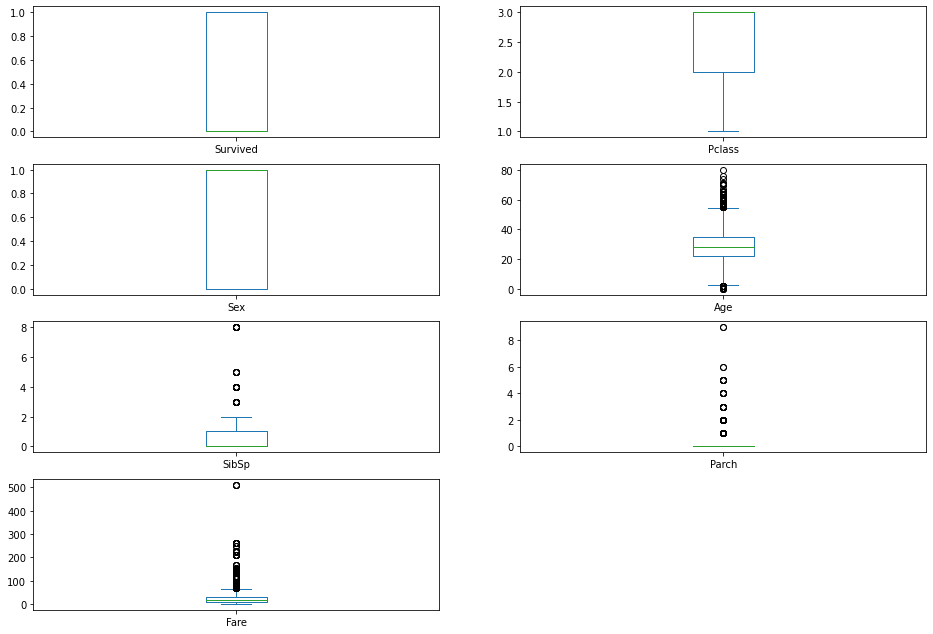

In [32]:
plt.figure(figsize=(16,14))
plt.subplot(5,2,1)
df['Survived'].plot(kind="box")

plt.subplot(5,2,2)
df['Pclass'].plot(kind="box")

plt.subplot(5,2,3)
df['Sex'].plot(kind="box")

plt.subplot(5,2,4)
df['Age'].plot(kind="box")

plt.subplot(5,2,5)
df['SibSp'].plot(kind="box")

plt.subplot(5,2,6)
df['Parch'].plot(kind="box")

plt.subplot(5,2,7)
df['Fare'].plot(kind="box")








In [33]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [34]:
df = treat_outliers_all(df,['Survived','Pclass','Sex','Age','SibSp','Parch','Fare'] )

In [35]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,7.2500,S
1,1,1,0,38.0,1.0,0.0,66.3438,C
2,1,3,0,26.0,0.0,0.0,7.9250,S
3,1,1,0,35.0,1.0,0.0,53.1000,S
4,0,3,1,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,1,28.0,0.0,0.0,8.0500,S
1305,1,1,0,39.0,0.0,0.0,66.3438,C
1306,0,3,1,38.5,0.0,0.0,7.2500,S
1307,0,3,1,28.0,0.0,0.0,8.0500,S


<AxesSubplot:>

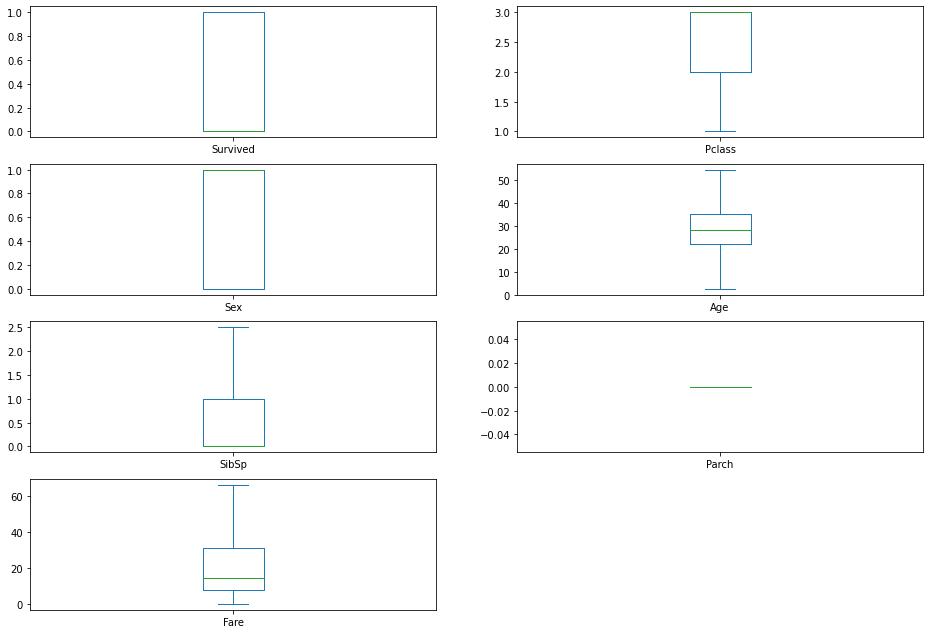

In [36]:
plt.figure(figsize=(16,14))
plt.subplot(5,2,1)
df['Survived'].plot(kind="box")

plt.subplot(5,2,2)
df['Pclass'].plot(kind="box")

plt.subplot(5,2,3)
df['Sex'].plot(kind="box")

plt.subplot(5,2,4)
df['Age'].plot(kind="box")

plt.subplot(5,2,5)
df['SibSp'].plot(kind="box")

plt.subplot(5,2,6)
df['Parch'].plot(kind="box")

plt.subplot(5,2,7)
df['Fare'].plot(kind="box")






In [37]:
df.dtypes

Survived      int64
Pclass        int64
Sex           uint8
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Age'>

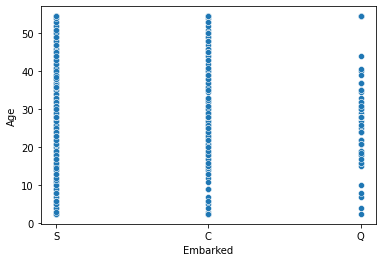

In [38]:
sns.scatterplot(df["Embarked"],df["Age"])

In [39]:
def string_into_int(data):
    for i in range(len(data)):
        if(data[i]=="S"):
            df["Embarked"][i]=1
        elif(data[i]=="C"):
            df["Embarked"][i]=2
        else:
            df["Embarked"][i]=3
    return df["Embarked"]

In [40]:
string_into_int(df["Embarked"])

C:\Users\dell\AppData\Local\Temp/ipykernel_3912/799033433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"][i]=1
C:\Users\dell\AppData\Local\Temp/ipykernel_3912/799033433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"][i]=2
C:\Users\dell\AppData\Local\Temp/ipykernel_3912/799033433.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"][i]=3


0       1
1       2
2       1
3       1
4       1
       ..
1304    1
1305    2
1306    1
1307    1
1308    2
Name: Embarked, Length: 1309, dtype: object

In [41]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=53)

In [43]:
from sklearn.naive_bayes import GaussianNB
mn=GaussianNB()  
mn.fit(x_train, y_train)  

GaussianNB()

In [44]:
y_pred = mn.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.8320610687022901

In [47]:
pr=mn.predict([[3,1,21.0,1.0,0.0,7.25,2]])
if(pr==0):
    print("Not Survived")
else:
    print("Survived")

Not Survived


In [48]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,7.25,1
